import os
import pandas as pd

current_dir = os.getcwd()
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
path_file = os.path.join(current_dir, "datasets/iris.data")
df = pd.read_csv(path_file, header=None, names=column_names)

df.head()

In [100]:
X = df.drop('species', axis=1)
y = df['species']

X, y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: speci

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
labels_train = kmeans.labels_

In [103]:
labels_test = kmeans.predict(X_test)

In [104]:
from sklearn.metrics import silhouette_score

silhouette_avg_train = silhouette_score(X_train, labels_train)
print(f"Coeficiente de Silhueta (Treinamento): {silhouette_avg_train:.2f}")

silhouette_avg_test = silhouette_score(X_test, labels_test)
print(f"Coeficiente de Silhueta (Teste): {silhouette_avg_test:.2f}")

Coeficiente de Silhueta (Treinamento): 0.51
Coeficiente de Silhueta (Teste): 0.54


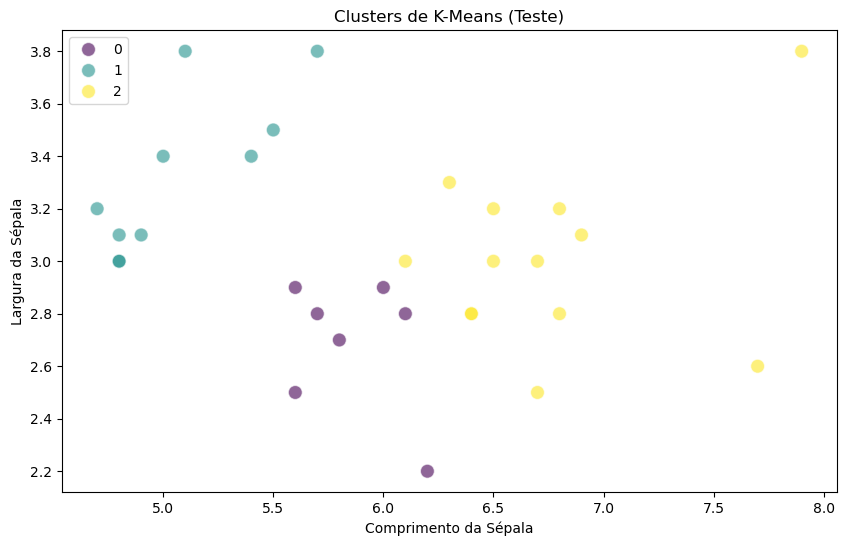

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['sepal_length'], y=X_test['sepal_width'], hue=labels_test, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters de K-Means (Teste)')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.show()